In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imutils
import copy
import sys
sys.setrecursionlimit(1000000)

In [375]:
im = cv2.imread("IMG_4.jpg")
RGB = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
# gray = cv2.GaussianBlur(gray, (3,3), 7)
edges = cv2.Canny(im, 10, 250)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
cnt = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnt = imutils.grab_contours(cnt)
for c in cnt:
    p = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02*p, True)
#     if len(approx) != 4:
#         cv2.drawContours(im, [approx], -1, (0, 255, 0), 4)

In [376]:
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

In [377]:
gray

array([[138, 137, 137, ...,  54,  57,  56],
       [137, 137, 137, ...,  60,  60,  65],
       [140, 140, 140, ...,  84,  82,  82],
       ...,
       [ 99,  99,  99, ..., 202, 202, 201],
       [101,  99,  96, ..., 203, 204, 203],
       [100,  95,  99, ..., 201, 201, 202]], dtype=uint8)

In [378]:
blue = np.array([[j[2] for j in i] for i in RGB], dtype = "uint8")

In [379]:
blue

array([[154, 153, 153, ...,  54,  57,  56],
       [153, 153, 153, ...,  67,  67,  72],
       [156, 156, 156, ..., 105, 101, 103],
       ...,
       [104, 104, 104, ..., 239, 239, 236],
       [106, 104, 101, ..., 240, 241, 238],
       [105, 100, 104, ..., 238, 238, 237]], dtype=uint8)

In [380]:
all_colors = sum([gray[i] for i in range(len(gray))])

In [381]:
quant = sorted(all_colors)[len(all_colors)* 7//8]

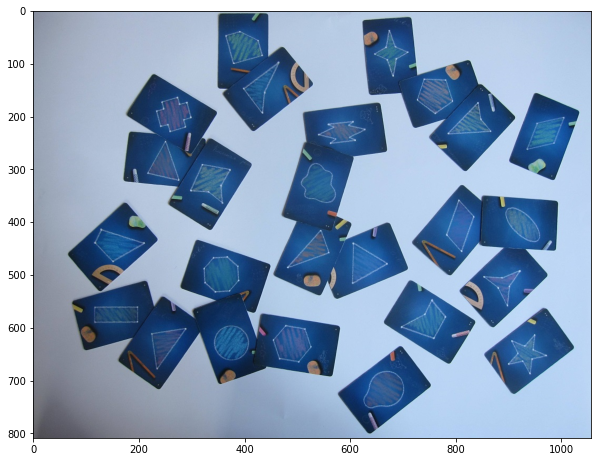

In [382]:
plt.figure(figsize=[10, 10])
plt.imshow(RGB)

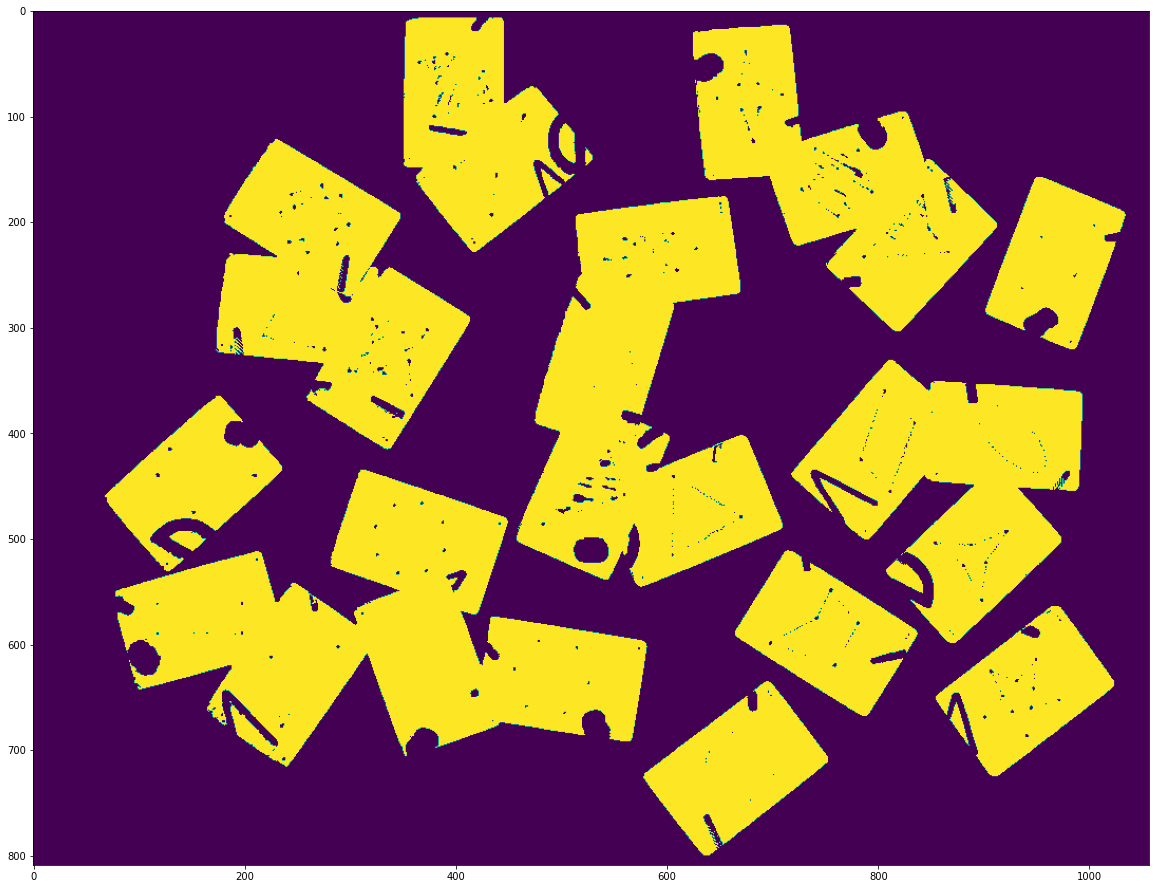

In [383]:
plt.figure(figsize=[20, 20])
RGB1 = np.array([[1 if ((j[0] < j[2]) and (j[1] < j[2])and (j[1]//2+j[0]//2<j[2]*0.7) and (j[2]<quant)) else 0 for j in i] for i in RGB], dtype='uint8')
plt.imshow(RGB1)

In [384]:
def area(im, point, points):
    if  1 <= point[0] < len(im)-1:
        if 1 <= point[1] < len(im[0])-1:
            points.append(point)
            im[point[0], point[1]] = 0
            point_id = 0
            while point_id < len(points):
                if  1 <= points[point_id][0] < len(im)-1:
                    if 1 <= points[point_id][1] < len(im[0])-1:

                        if im[points[point_id][0], points[point_id][1] + 1] == 1:
                            points.append((points[point_id][0], points[point_id][1] + 1))
                            im[points[point_id][0], points[point_id][1] + 1] = 0

                        if im[points[point_id][0], points[point_id][1] - 1] == 1:
                            points.append((points[point_id][0], points[point_id][1] - 1))
                            im[points[point_id][0], points[point_id][1] - 1] = 0

                        if im[points[point_id][0] + 1, points[point_id][1]] == 1:
                            points.append((points[point_id][0] + 1, points[point_id][1]))
                            im[points[point_id][0] + 1, points[point_id][1]] = 0

                        if im[points[point_id][0] - 1, points[point_id][1]] == 1:
                            points.append((points[point_id][0] - 1, points[point_id][1]))
                            im[points[point_id][0] - 1, points[point_id][1]] = 0
                
                point_id+=1

In [385]:
im_area = copy.deepcopy(RGB1)
pointss = []
for i in range(len(im_area)):
    for j in range(len(im_area[0])):
        if im_area[i,j] == 1:
            points = []
            area(im_area, (i,j), points)
            pointss.append(points)

In [386]:
i = 0
while i < len(pointss):
    if len(pointss[i]) < 4000:
        pointss.pop(i)
    else:
        i+=1

In [387]:
len(pointss)

11

In [388]:
lens = np.array([len(i) for i in pointss])

(array([5., 1., 0., 0., 3., 0., 1., 0., 0., 1.]),
 array([12062. , 17504.6, 22947.2, 28389.8, 33832.4, 39275. , 44717.6,
        50160.2, 55602.8, 61045.4, 66488. ]),
 <BarContainer object of 10 artists>)

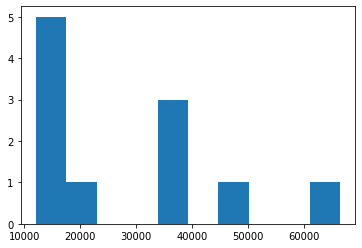

In [389]:
plt.hist(lens)

In [390]:
def pr(lens):
    return [sorted(lens)[i+1] - sorted(lens)[i] for i in range(len(lens)-1)]

def avg(lens):
    return sum(lens)/len(lens)

def disp(lens):
    return sum((lens - avg(lens))**2)/len(lens)

In [391]:
# disp(lens)**(1/2)
disp(pr(lens))**(1/2)
# 301343520
# 0.3659292
# 11644013
# 0.1040125
# 2265230

6104.218020352811

In [340]:
sorted(lens)
min_card_size = min(lens)
avg_card_size = sum(lens[lens<min_card_size*1.5])/len(lens[lens<min_card_size*1.5])

In [341]:
for i in pointss:
    print(round(len(i) / avg_card_size))

1
1
1
1
1
1
1
1
1
1
1
2
1
2
2
2
2
2


In [342]:
print(lens)

[ 6324  6518  6790  7047  7477  8885  9503  9421  9346 10247 10356 12329
 11119 13599 12445 13733 16007 19304]


In [205]:
new_im = copy.deepcopy(RGB1)

In [206]:
for i in range(len(new_im)):
    for j in range(len(new_im[0])):
        new_im[i,j]=0

for i in pointss:
    for j in i:
        new_im[j[0],j[1]]=255

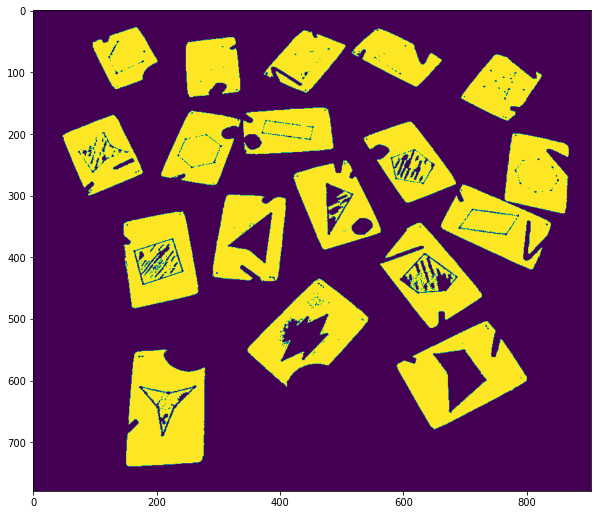

In [207]:
plt.figure(figsize=[10, 10])
plt.imshow(new_im)

In [113]:
sorted(pointss[0])

[(7, 365),
 (7, 365),
 (7, 366),
 (7, 367),
 (7, 368),
 (7, 369),
 (7, 370),
 (7, 371),
 (7, 372),
 (7, 373),
 (7, 374),
 (7, 375),
 (7, 376),
 (7, 377),
 (7, 378),
 (7, 379),
 (7, 380),
 (7, 381),
 (7, 382),
 (7, 383),
 (7, 384),
 (7, 385),
 (7, 386),
 (7, 387),
 (7, 388),
 (7, 389),
 (7, 390),
 (7, 391),
 (7, 392),
 (7, 393),
 (7, 394),
 (7, 395),
 (7, 396),
 (7, 397),
 (7, 398),
 (7, 399),
 (7, 400),
 (7, 401),
 (7, 402),
 (7, 403),
 (7, 404),
 (7, 405),
 (7, 406),
 (7, 407),
 (7, 408),
 (7, 409),
 (7, 410),
 (7, 411),
 (7, 412),
 (7, 413),
 (7, 414),
 (7, 415),
 (7, 416),
 (7, 417),
 (7, 418),
 (7, 419),
 (7, 432),
 (7, 433),
 (7, 434),
 (7, 436),
 (7, 437),
 (7, 438),
 (7, 439),
 (7, 440),
 (7, 441),
 (7, 442),
 (7, 443),
 (8, 359),
 (8, 360),
 (8, 361),
 (8, 362),
 (8, 363),
 (8, 364),
 (8, 365),
 (8, 366),
 (8, 367),
 (8, 368),
 (8, 369),
 (8, 370),
 (8, 371),
 (8, 372),
 (8, 373),
 (8, 374),
 (8, 375),
 (8, 376),
 (8, 377),
 (8, 378),
 (8, 379),
 (8, 380),
 (8, 381),
 (8, 382),

In [114]:
(53,742) in pointss[0]

False

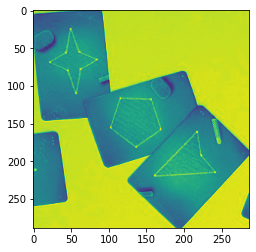

In [123]:
card = pointss[1]
bottom = min([i[0] for i in card])
top = max([i[0] for i in card])
left = min([i[1] for i in card])
right = max([i[1] for i in card])
card_in_pixels = np.zeros(shape = (top-bottom, right-left), dtype = "uint8")
for i in range(bottom, top):
    for j in range(left, right):
        card_in_pixels[i-bottom, j-left] = blue[i,j]
    
plt.imshow(card_in_pixels)

In [129]:
def center(points):
    N = len(points)
    x_center = sum([point[0] for point in points])/N
    y_center = sum([point[1] for point in points])/N
    return x_center, y_center

def farthest_point(points, point):
    max_dist = 0
    my_point = point
    for some_point in points:
        if dist(some_point, point) > max_dist:
            max_dist = dist(some_point, point)
            my_point = some_point
            
    return my_point

farthest_point(pointss[1], center(pointss[1]))

(21, 625)

In [140]:
def nearests_points(im, n_points, point, points):
    
    if  1 <= point[0] < len(im)-1:
        if 1 <= point[1] < len(im[0])-1:
            points.append(point)
            im[point[0], point[1]] = 0
            point_id = 0

            while point_id < len(points):
                if len(points)< n_points:
                    if  1 <= points[point_id][0] < len(im)-1:
                        if 1 <= points[point_id][1] < len(im[0])-1:

                            if im[points[point_id][0], points[point_id][1] + 1] == 1:
                                points.append((points[point_id][0], points[point_id][1] + 1))
                                im[points[point_id][0], points[point_id][1] + 1] = 0

                            if im[points[point_id][0], points[point_id][1] - 1] == 1:
                                points.append((points[point_id][0], points[point_id][1] - 1))
                                im[points[point_id][0], points[point_id][1] - 1] = 0

                            if im[points[point_id][0] + 1, points[point_id][1]] == 1:
                                points.append((points[point_id][0] + 1, points[point_id][1]))
                                im[points[point_id][0] + 1, points[point_id][1]] = 0

                            if im[points[point_id][0] - 1, points[point_id][1]] == 1:
                                points.append((points[point_id][0] - 1, points[point_id][1]))
                                im[points[point_id][0] - 1, points[point_id][1]] = 0
                
                point_id+=1

In [159]:
im_area = copy.deepcopy(RGB1)
qkrq_points = []
nearests_points(im_area, 11000, farthest_point(pointss[2], center(pointss[1])), qkrq_points)

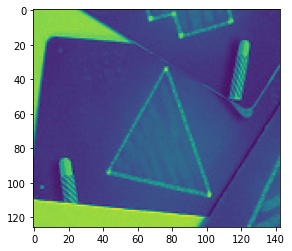

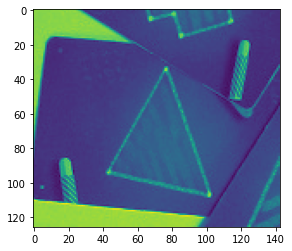

In [160]:
card = qkrq_points
bottom = min([i[0] for i in card])
top = max([i[0] for i in card])
left = min([i[1] for i in card])
right = max([i[1] for i in card])
card_in_pixels = np.zeros(shape = (top-bottom, right-left), dtype = "uint8")
for i in range(bottom, top):
    for j in range(left, right):
        card_in_pixels[i-bottom, j-left] = gray[i,j]
plt.figure()
plt.imshow(card_in_pixels)
coef = 127
color_in_card = sum([i for i in card_in_pixels])
col = sum(color_in_card)/len(color_in_card)
for i in range(len(card_in_pixels)):
    for j in range(len(card_in_pixels[0])):
        card_in_pixels[i,j] = card_in_pixels[i,j]*coef/col
plt.figure()  
plt.imshow(card_in_pixels)

3


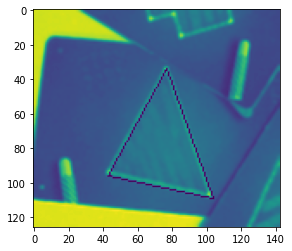

In [163]:
card_picture(qkrq_points)

In [128]:
def dist(point1, point2):
    return ((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)**(1/2)

def dist_to_center(card_in_pixels, pixel):
    center = (len(card_in_pixels)//2, len(card_in_pixels[0])//2)
    return ((center[0]-pixel[0])**2 + (center[1]-pixel[1])**2)**(1/2)

In [118]:
# all_colors_in_card = sum([i for i in card_in_pixels])
# col = sorted(all_colors_in_card)[len(all_colors_in_card)//2]
# for i in range(len(card_in_pixels)):
#     for j in range(len(card_in_pixels[0])):
#         dist = dist_to_center(card_in_pixels, (i,j))
#         card_in_pixels[i,j] = col * dist**2/(dist**2+1000) + card_in_pixels[i,j]*1000/(dist**2+1000)
# #         if dist > 100:
# #             card_in_pixels[i,j] = col
# plt.imshow(card_in_pixels)

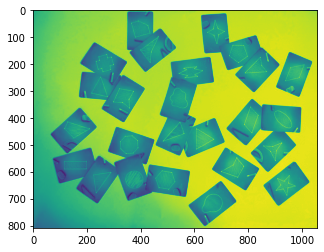

In [119]:
plt.imshow(blue)

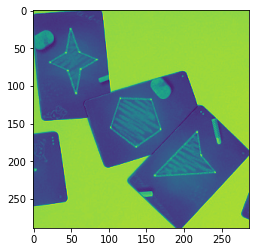

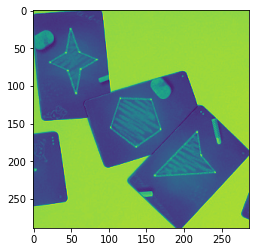

In [120]:
card = pointss[1]
bottom = min([i[0] for i in card])
top = max([i[0] for i in card])
left = min([i[1] for i in card])
right = max([i[1] for i in card])
card_in_pixels = np.zeros(shape = (top-bottom, right-left), dtype = "uint8")
for i in range(bottom, top):
    for j in range(left, right):
        card_in_pixels[i-bottom, j-left] = gray[i,j]
plt.figure()
plt.imshow(card_in_pixels)
coef = 127
color_in_card = sum([i for i in card_in_pixels])
col = sum(color_in_card)/len(color_in_card)
for i in range(len(card_in_pixels)):
    for j in range(len(card_in_pixels[0])):
        card_in_pixels[i,j] = card_in_pixels[i,j]*coef/col
plt.figure()  
plt.imshow(card_in_pixels)

In [121]:
col

126.79442508710801

12
5
15
4
13
4
4
4
5
10
8


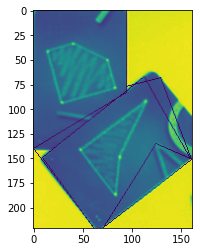

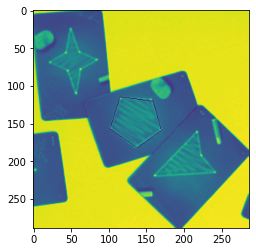

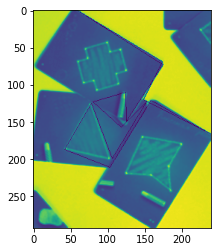

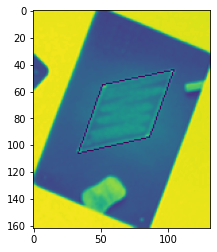

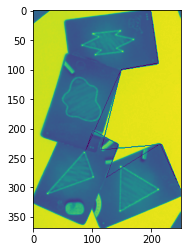

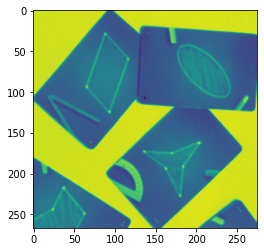

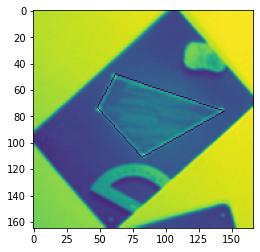

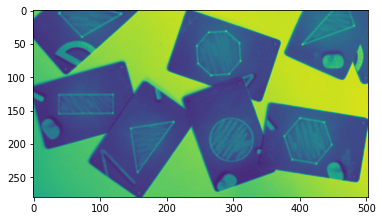

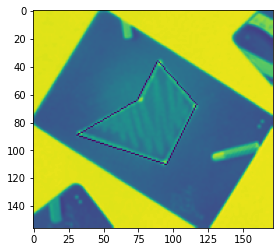

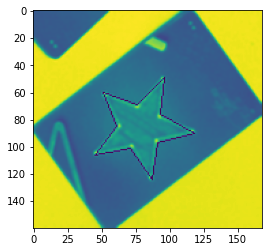

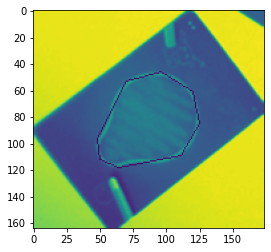

In [164]:
l = 0
for i in range(len(pointss)):
    card = pointss[i]
    bottom = min([i[0] for i in card])
    top = max([i[0] for i in card])
    left = min([i[1] for i in card])
    right = max([i[1] for i in card])
    card_in_pixels = np.zeros(shape = (top-bottom + 2*l, right-left + 2*l), dtype = "uint8")
    for i in range(bottom-l, top+l):
        for j in range(left-l, right+l):
            card_in_pixels[i-bottom, j-left] = gray[i,j]


    card_in_pixels = cv2.GaussianBlur(card_in_pixels, (3,3), 0)
    edges = cv2.Canny(card_in_pixels, 10, 100)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
    cnt = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnt = imutils.grab_contours(cnt)

    min_dist = None
    cont = []

    for c in cnt:
        p = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02* p, True)
        mean_x = sum([i[0][1]for i in approx])/len([i[0][1]for i in approx])
        mean_y = sum([i[0][0]for i in approx])/len([i[0][0]for i in approx])
        our_dist = dist_to_center(card_in_pixels, (mean_x,mean_y))
        if min_dist is not None:
            if our_dist < min_dist:
                min_dist = our_dist
                cont = approx
        else:
            min_dist = our_dist
            cont = approx
    #     cv2.drawContours(card_in_pixels, [approx], -1, (0, 255, 0), 1)

    print(len(cont))
    cv2.drawContours(card_in_pixels, [cont], -1, (0, 255, 0), 1)
    plt.figure()
    plt.imshow(card_in_pixels)

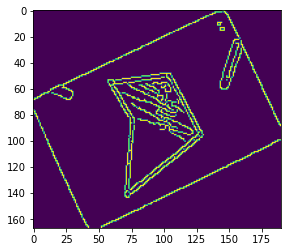

In [93]:
plt.imshow(edges)

## approx

In [335]:
sum([i[0][0]for i in approx])/len([i[0][0]for i in approx])

101.0

In [ ]:
# coef = 127
# color_in_card = sum([i for i in card_in_pixels])
# col = sum(color_in_card)/len(color_in_card)
# for i in range(len(card_in_pixels)):
#     for j in range(len(card_in_pixels[0])):
#         card_in_pixels[i,j] = card_in_pixels[i,j]*coef/col
# col = sorted(all_colors_in_card)[len(all_colors_in_card)//2]
# for i in range(len(card_in_pixels)):
#     for j in range(len(card_in_pixels[0])):
#         dist = dist_to_center(card_in_pixels, (i,j))
#         card_in_pixels[i,j] = col * dist**3/(dist**3+coef) + card_in_pixels[i,j]*coef/(dist**3+coef)
#         if dist > 100:
#             card_in_pixels[i,j] = col
# plt.imshow(card_in_pixels

In [26]:
gray1 = cv2.GaussianBlur(gray1, (21,21), 100)
plt.imshow(gray1)

NameError: name 'gray1' is not defined

In [268]:
qq = np.array([[255 if j == 1 else 0 for j in i] for i in gray2], dtype='uint8')
plt.imshow(qq)

NameError: name 'gray2' is not defined

In [ ]:
step = 1
gray2 = copy.deepcopy(gray1)
for i in range(step,len(gray1)-2*step):
    for j in range(step,len(gray1[0])-2*step):
        gray2[i,j] = 1 if sum([gray1[i+step,j+step],gray1[i+step,j],gray1[i+step,j-step],
                              gray1[i,j+step],gray1[i,j],gray1[i,j-step],
                              gray1[i-step,j+step],gray1[i-step,j],gray1[i-step,j-step]]) > 8 else 0
plt.imshow(gray2)

In [ ]:
plt.imshow(gray1)

In [ ]:
gray1 = cv2.cvtColor(gray1, cv2.COLOR_BAYER_GR2RGB)

In [162]:
def card_picture(points):
    card = points
    bottom = min([i[0] for i in card])
    top = max([i[0] for i in card])
    left = min([i[1] for i in card])
    right = max([i[1] for i in card])
    card_in_pixels = np.zeros(shape = (top-bottom + 2*l, right-left + 2*l), dtype = "uint8")
    for i in range(bottom-l, top+l):
        for j in range(left-l, right+l):
            card_in_pixels[i-bottom, j-left] = gray[i,j]


    card_in_pixels = cv2.GaussianBlur(card_in_pixels, (3,3), 0)
    edges = cv2.Canny(card_in_pixels, 10, 100)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
    closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
    cnt = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnt = imutils.grab_contours(cnt)

    min_dist = None
    cont = []

    for c in cnt:
        p = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02* p, True)
        mean_x = sum([i[0][1]for i in approx])/len([i[0][1]for i in approx])
        mean_y = sum([i[0][0]for i in approx])/len([i[0][0]for i in approx])
        our_dist = dist_to_center(card_in_pixels, (mean_x,mean_y))
        if min_dist is not None:
            if our_dist < min_dist:
                min_dist = our_dist
                cont = approx
        else:
            min_dist = our_dist
            cont = approx
    #     cv2.drawContours(card_in_pixels, [approx], -1, (0, 255, 0), 1)

    print(len(cont))
    cv2.drawContours(card_in_pixels, [cont], -1, (0, 255, 0), 1)
    plt.figure()
    plt.imshow(card_in_pixels)